## [作業重點]
清楚了解 L1, L2 的意義與差異為何，並了解 LASSO 與 Ridge 之間的差異與使用情境

## 作業

請閱讀相關文獻，並回答下列問題

[脊回歸 (Ridge Regression)](https://blog.csdn.net/daunxx/article/details/51578787)
[Linear, Ridge, Lasso Regression 本質區別](https://www.zhihu.com/question/38121173)

1. LASSO 回歸可以被用來作為 Feature selection 的工具，請了解 LASSO 模型為什麼可用來作 Feature selection
2. 當自變數 (X) 存在高度共線性時，Ridge Regression 可以處理這樣的問題嗎?


1. LASSO:l1正則化 RIDGE:l2正則化 LASSO因為其可以將特徵不重要或共線性的特徵壓縮至0
2. 可以

## Ridge Regression Test

In [1]:
# import 套件
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# 這裡設計矩陣X是一個hilbert matrix
# 其元素A(i,j) = 1(i+j)-1,i和j分別為其行標核列標
# hilbert矩陣是一種數學變換矩陣，正定，且高度病態
# 即任何一個元素發生變動，整個矩陣的行列式值和逆舉值都會發生巨大變化
# X是一個10x5的矩陣，即有10個樣本，5個變量
X = 1./(np.arange(1,6)+np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

In [2]:
print("matrix X:\n",X)
print(y)

matrix X:
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.14285714 0.125      0.11111111 0.1        0.09090909]
 [0.125      0.11111111 0.1        0.09090909 0.08333333]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308]
 [0.1        0.09090909 0.08333333 0.07692308 0.07142857]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [3]:
# alpha值取為10^(-10) 到10^2之間的200個值(成等比級數)
n_alphas = 200
alphas = np.logspace(-10,-2,200)
print("alpha: ",alphas)

alpha:  [1.00000000e-10 1.09698580e-10 1.20337784e-10 1.32008840e-10
 1.44811823e-10 1.58856513e-10 1.74263339e-10 1.91164408e-10
 2.09704640e-10 2.30043012e-10 2.52353917e-10 2.76828663e-10
 3.03677112e-10 3.33129479e-10 3.65438307e-10 4.00880633e-10
 4.39760361e-10 4.82410870e-10 5.29197874e-10 5.80522552e-10
 6.36824994e-10 6.98587975e-10 7.66341087e-10 8.40665289e-10
 9.22197882e-10 1.01163798e-09 1.10975250e-09 1.21738273e-09
 1.33545156e-09 1.46497140e-09 1.60705282e-09 1.76291412e-09
 1.93389175e-09 2.12145178e-09 2.32720248e-09 2.55290807e-09
 2.80050389e-09 3.07211300e-09 3.37006433e-09 3.69691271e-09
 4.05546074e-09 4.44878283e-09 4.88025158e-09 5.35356668e-09
 5.87278661e-09 6.44236351e-09 7.06718127e-09 7.75259749e-09
 8.50448934e-09 9.32930403e-09 1.02341140e-08 1.12266777e-08
 1.23155060e-08 1.35099352e-08 1.48202071e-08 1.62575567e-08
 1.78343088e-08 1.95639834e-08 2.14614120e-08 2.35428641e-08
 2.58261876e-08 2.83309610e-08 3.10786619e-08 3.40928507e-08
 3.73993730e-08 

In [4]:
# 初始化一個ridge regression
clf = linear_model.Ridge(fit_intercept=False)
# 參數矩陣
coefs = []
# 根據不同的alphas訓練出不同的參數模型
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X,y)
    coefs.append(clf.coef_)
coefs

[array([   10.15282689,  -223.11971819,  1090.99454433, -1831.84219264,
          983.51266652]),
 array([    9.76177487,  -216.69445264,  1065.68710458, -1796.12671191,
          966.93938402]),
 array([    9.35054075,  -209.93750476,  1039.07306544, -1758.56708535,
          949.5102848 ]),
 array([    8.91941829,  -202.85368415,  1011.17132804, -1719.18994502,
          931.23771228]),
 array([    8.46890965,  -195.45122231,   982.01426569, -1678.04092989,
          912.14282776]),
 array([    7.99973547,  -187.74193807,   951.64837471, -1635.18560367,
          892.25603604]),
 array([    7.51284507,  -179.74140429,   920.1349305 , -1590.71038036,
          871.61741479]),
 array([    7.00941539,  -171.46893132,   887.54992204, -1544.72243116,
          850.27667116]),
 array([    6.49085491,  -162.94763035,   853.98430082, -1497.35003541,
          828.2933045 ]),
 array([    5.9587886 ,  -154.20416663,   819.54300847, -1448.7412079 ,
          805.73596918]),
 array([    5.415046

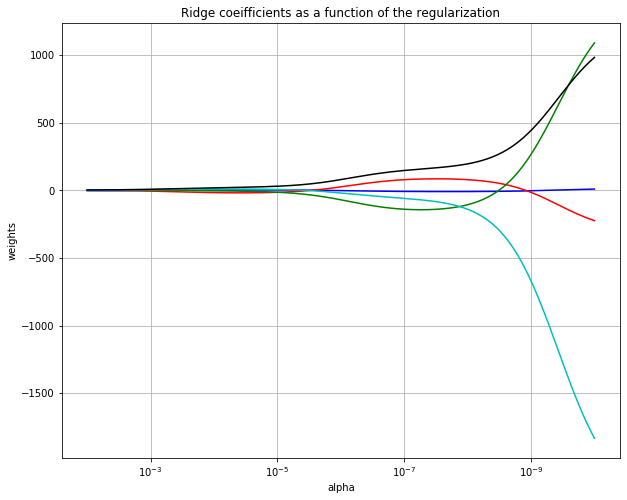

In [5]:
# 繪圖
plt.figure(figsize=(10,8))
ax = plt.gca()
# 每一種參數使用一個顏色
ax.set_prop_cycle(color=['b','r','g','c','k'])

# 繪製alpha和對應的參數之間關係圖
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #將x軸左右對調，x越大越靠近右邊
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Ridge coeifficients as a function of the regularization")
plt.axis('tight')
plt.show()

可以看到橫軸x越像右，也就是懲罰項越小，權重越大。